<a href="https://colab.research.google.com/github/AlexZamora17/TAREA-1-ESTADISTICA-M/blob/main/Tarea1_EM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Ejercicio 2

In [ ]:
import numpy as np

X=np.array([[1,0,0,0],[1,1,0,0],[1,1,1,0],[1,1,1,1]])

# Matriz de covarianza.
S = np.cov(X, rowvar = False)

# Vamos a calcular eigenvalores y eigenvectores
eigen_val, eigen_vec = np.linalg.eigh(S)

eigen_val[::-1]
eigen_vec = eigen_vec[:,np.argsort(eigen_val)[::-1]]

n_components = 2
eigenvector_2 = eigen_vec[:,0:n_components]

# Descomposición espectral
#este tienen la info de las componentenes principales
Y_red = np.dot(eigenvector_2.transpose(),X.transpose()).transpose()

eigen_val_total = sum(eigen_val)  #es la traza de la matriz
varianza_explicada = [(i/ eigen_val_total )*100 for i in eigen_val ]
varianza_explicada_acumulada = np.cumsum(varianza_explicada)
print("Varianza explicada acumulada: {}".format(varianza_explicada_acumulada))

Varianza explicada acumulada: [  0.   0. 100.]


## Ejercicio 3

In [ ]:
import pandas as pd
import numpy as np

# Datos
url = "wine.data"
data = pd.read_csv(url)
data

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
np.mean(data)
#Media por columnas
np.mean(data, axis = 0)
#media por renglones
np.mean(data, axis = 1)
#Centramos
dta_media = data - np.mean(data, axis = 0)
#Matriz covarianza
S = np.cov(dta_media, rowvar = False)
print(S)
#Eigenvalores y eigenvectores
eigen_val, eigen_vec = np.linalg.eigh(S)
eigen_val[::-1]
#Eigenvalores decreciente
eigen_val = eigen_val[np.argsort(eigen_val)[::-1]]
eigen_val

eigen_vec = eigen_vec[:,np.argsort(eigen_val)[::-1]]
eigen_vec
n_components = 2
eigenvector_2 = eigen_vec[:,0:n_components]

#descomposicion espectral
dta_red = np.dot(eigenvector_2.transpose(),dta_media.transpose()).transpose()
dta_red

# Info total
eigen_val_total = sum(eigen_val)
var_expl = [(i/ eigen_val_total )*100 for i in eigen_val ]
var_expl = np.round(var_expl, 2)
var_expl_ac = np.cumsum(var_expl)
print("Varianza explicada: {}".format(var_expl))
print("Varianza explicada acumulada: {}".format(var_expl_ac))

[[ 5.99062661e-01 -2.01098164e-01  3.77834489e-01 -1.02751027e-02
   1.32709938e+00 -2.18252440e+00 -3.48110234e-01 -6.54292822e-01
   4.70066127e-02 -2.18923344e-01  4.83170577e-01 -1.09546418e-01
  -4.29187853e-01 -1.53841134e+02]
 [-2.01098164e-01  6.54171097e-01  9.04975764e-02  4.69369158e-02
  -8.18511460e-01  2.96623909e+00  1.44175177e-01  1.85883863e-01
  -1.52687821e-02  5.89675173e-02  1.03003738e+00 -1.39689715e-02
   3.27443695e-02  1.63267657e+02]
 [ 3.77834489e-01  9.04975764e-02  1.25286476e+00  5.07899043e-02
   1.06850761e+00 -7.78171867e-01 -2.33862243e-01 -4.57547336e-01
   4.06718541e-02 -1.39446938e-01  6.50584636e-01 -1.43844547e-01
  -2.89426785e-01 -6.67941936e+01]
 [-1.02751027e-02  4.69369158e-02  5.07899043e-02  7.56692476e-02
   4.09929122e-01  1.11942925e+00  2.20882768e-02  3.13400199e-02
   6.42429058e-03  1.27059900e-03  1.65378782e-01 -4.73870185e-03
   2.91589625e-04  1.93141211e+01]
 [ 1.32709938e+00 -8.18511460e-01  1.06850761e+00  4.09929122e-01
  

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
#Analisis de resultados
#El primer componente principal explica la gran mayoría de la varianza en los datos
(aproximadamente el 99.81%). Esto sugiere que una gran cantidad de información en los datos originales se puede capturar utilizando solo este componente principal.')

El primer componente principal explica la gran mayoría de la varianza en los datos (aproximadamente el 99.81%). Esto sugiere que una gran cantidad de información en los datos originales se puede capturar utilizando solo este componente principal.



##Ejercicio 4

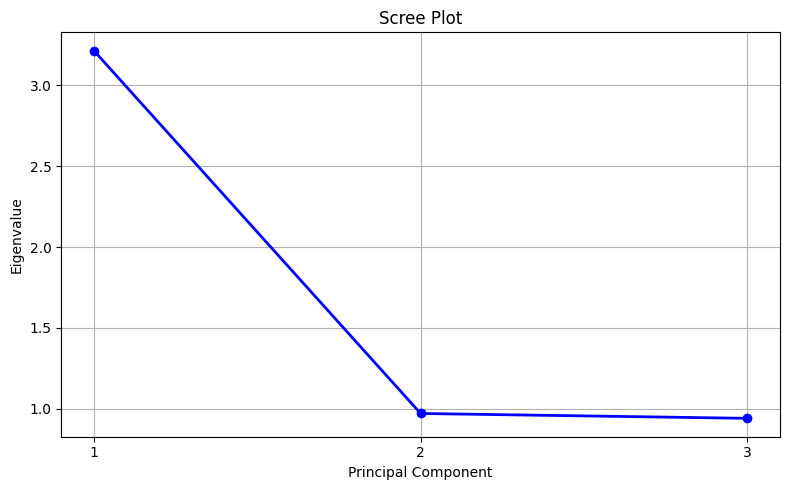

(array([3.21492799, 0.97080994, 0.94068578]),
 array([[-0.99448388, -0.08673332,  0.0589842 ],
        [-0.08781785,  0.38098854, -0.92039978],
        [ 0.05735702, -0.92050261, -0.3865037 ]]),
 None)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Generar una muestra aleatoria de tamaño 100 de una distribución gaussiana 3-dimensional
# con una varianza más alta para una de las variables.
np.random.seed(0)
mean = [0, 0, 0]  # Media de las tres dimensiones
cov = [[3, 0, 0],  # Matriz de covarianza con una varianza más alta en una variable
       [0, 1, 0],
       [0, 0, 1]]
X = np.random.multivariate_normal(mean, cov, 100)

# Realizar PCA
pca = PCA(n_components=3)
pca.fit(X)

# Eigenvalores y eigenvectores
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

# Gráfica scree
plt.figure(figsize=(8, 5))
plt.plot(range(1, 4), eigenvalues, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.xticks(range(1, 4))
plt.tight_layout()

eigenvalues, eigenvectors, plt.show()


##Ejercicio 5

In [ ]:
import numpy as np

X=np.array([[1,0,0,0],[1,1,0,0],[1,1,1,0],[1,1,1,1]])

# Matriz de covarianza.
S = np.cov(X, rowvar = False)

# Vamos a calcular eigenvalores y eigenvectores
eigen_val, eigen_vec = np.linalg.eigh(S)
eigen_val[::-1]
eigen_vec = eigen_vec[:,np.argsort(eigen_val)[::-1]]
n_components = 2
eigenvector_2 = eigen_vec[:,0:n_components]

# Descomposición espectral
#este tienen la info de las componentenes principales
Y_red = np.dot(eigenvector_2.transpose(),X.transpose()).transpose()

eigen_val_total = sum(eigen_val)  #es la traza de la matriz
varianza_explicada = [(i/ eigen_val_total )*100 for i in eigen_val ]
varianza_explicada_acumulada = np.cumsum(varianza_explicada)

X_media = X - np.mean(X , axis = 0)

cov_mat = np.cov(X_media , rowvar = False)

eigen_val , eigen_vec = np.linalg.eigh(cov_mat)

sorted_index = np.argsort(eigen_val)[::-1]
sorted_eigenval = eigen_val[sorted_index]
sorted_eigenvec = eigen_vec[:,sorted_index]

eigenvector_ = sorted_eigenvec[:,0:n_components]

X_red = np.dot(eigenvector_.transpose() , X_media.transpose() ).transpose()
print(X_red)
print()
# Para conseguir la coordenadas
proyeccion = np.dot(X, sorted_eigenvec[:, :2])

print("Las coordenadas son:", proyeccion)

[[ 0.85355339  0.35355339]
 [ 0.35355339 -0.35355339]
 [-0.35355339 -0.35355339]
 [-0.85355339  0.35355339]]

Las coordenadas son: [[ 0.00000000e+00  0.00000000e+00]
 [-5.00000000e-01 -7.07106781e-01]
 [-1.20710678e+00 -7.07106781e-01]
 [-1.70710678e+00  2.22044605e-16]]


## Ejercicio 7